In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [11]:
df = df.sort_values(by='hour_beginning') #Arranging data in chronological order first and then proceeding to forward/back fill
df.reset_index(drop=True, inplace=True)  #drop=True discards the current index, inplace=True applies changes to the df
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
year                     0
dtype: int64

1)Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='day_name'>

Text(0.5, 1.0, 'Pedestrian Counts by Day of the Week (Weekdays Only)')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Total Pedestrian Count')

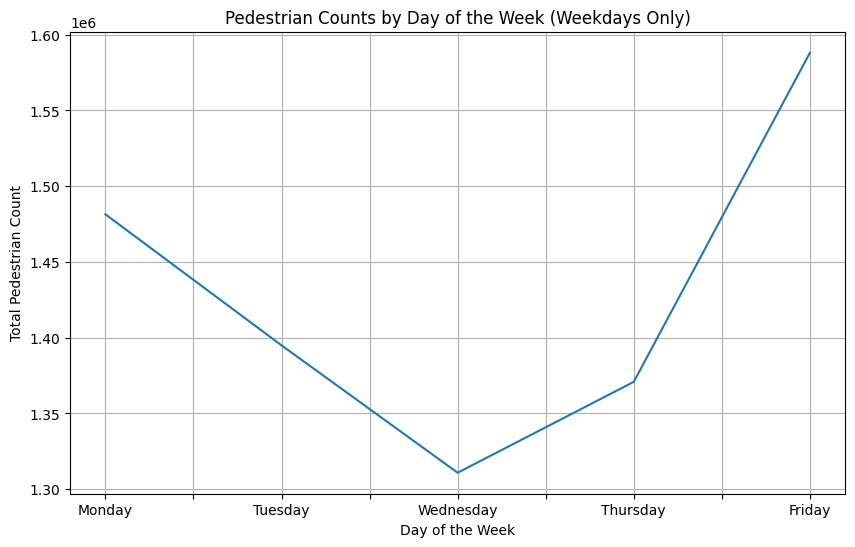

In [32]:

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_name'] = df['hour_beginning'].dt.day_name()
weekdays = df[df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

weekday_counts = weekdays.groupby('day_name')['Pedestrians'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line')
plt.title('Pedestrian Counts by Day of the Week (Weekdays Only)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='hour_beginning'>

Text(0.5, 1.0, 'Pedestrian Counts Over Time (Weekdays Only)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Total Pedestrian Count')

(array([17440., 17532., 17622., 17713., 17805., 17897., 17987., 18078.,
        18170., 18262.]),
 [Text(17440.0, 0, '2017-10'),
  Text(17532.0, 0, '2018-01'),
  Text(17622.0, 0, '2018-04'),
  Text(17713.0, 0, '2018-07'),
  Text(17805.0, 0, '2018-10'),
  Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01')])

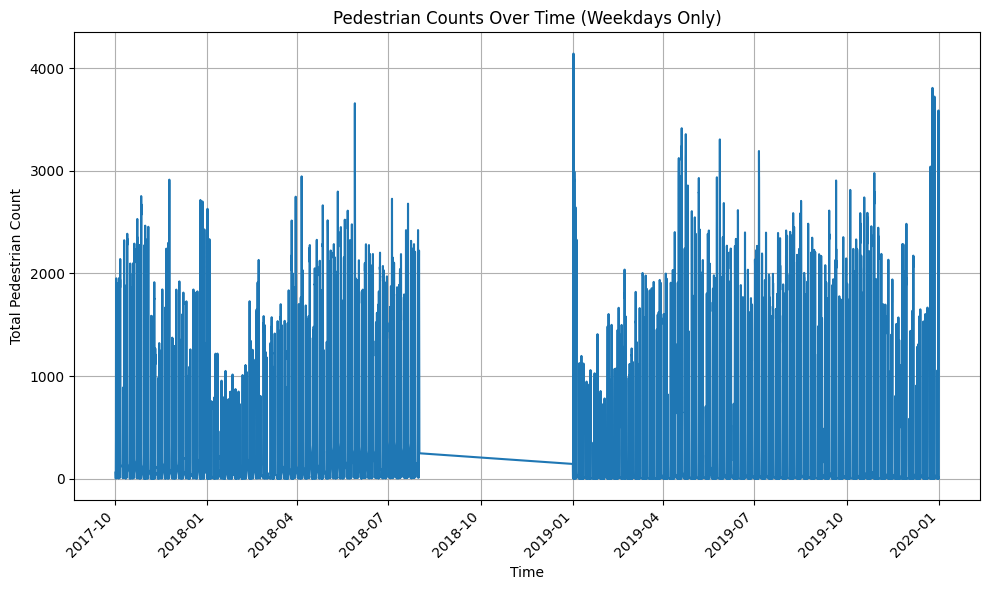

In [37]:
import pandas as pd

# Load the DataFrame (assuming it's named df and the URL has been defined)
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# Convert 'hour_beginning' to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract day names into a new column
df['day_name'] = df['hour_beginning'].dt.day_name()

# Filter for weekdays only
weekdays_df = df[df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

import matplotlib.pyplot as plt

# Assuming 'hour_beginning' is already in datetime format and indexed appropriately
# Group by 'hour_beginning' to aggregate pedestrian counts over time
time_grouped_counts = weekdays_df.groupby('hour_beginning')['Pedestrians'].sum()

# Plotting the line graph
plt.figure(figsize=(10, 6))
#time_grouped_counts.plot(kind='line', marker='o')
time_grouped_counts.plot(kind='line')
plt.title('Pedestrian Counts Over Time (Weekdays Only)')
plt.xlabel('Time')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add grid lines for easier visualization
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()


2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Pedestrians, Temperature, and Precipitation')

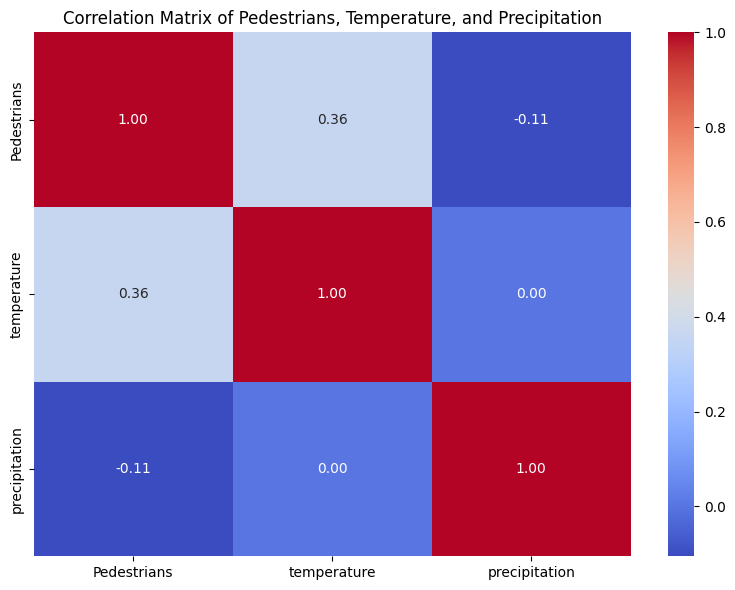

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Load the DataFrame (assuming it's named df and the URL has been defined)
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# Convert 'hour_beginning' to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Directly extract the year into a new column (if not already present)
df['year'] = df['hour_beginning'].dt.year

# Filter the DataFrame for the year 2019
year_2019_df = df[df['year'] == 2019]

# Creating a correlation matrix
correlation_matrix = year_2019_df[['Pedestrians', 'temperature', 'precipitation']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation')
plt.tight_layout()
plt.show()


3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.


In [ ]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Pedestrian Activity Patterns Throughout the Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Total Pedestrian Count')

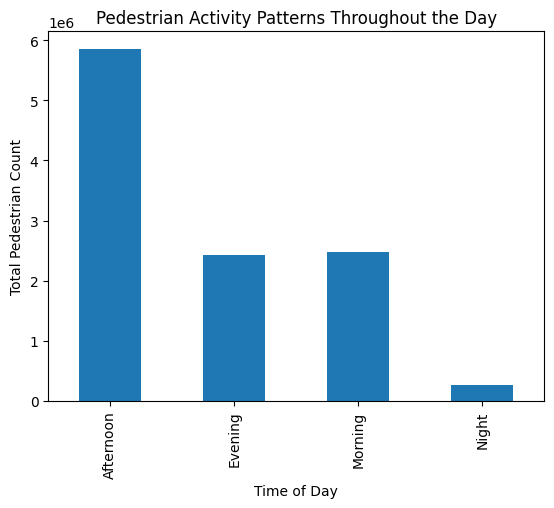

In [12]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['hour'] = df['hour_beginning'].dt.hour
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

#df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

time_of_day_counts = df.groupby('time_of_day')['Pedestrians'].sum()

time_of_day_counts.plot(kind='bar')
plt.title('Pedestrian Activity Patterns Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.show()